# Don't repeat yourself


## Functions and iteration
In this exercise, we'll define two functions, print_files() and list_files(), that will each use read_text().

The print_files() function will use a for loop to print file contents and not return anything.

The list_files() function will use a list comprehension to return a list of file contents.

In the video, we used the Path class's read_text() method to read in text files.

If you don't remember how this worked, you can take a look at the slides.

Path has already been imported from the pathlib module.

We will also use the pprint() function (short for pretty print) from the standard library pprint module to make the list output a little more readable.

### init

In [3]:
###################
##### file
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
boston.txt  diabetes.txt  digits.txt  iris.txt	wine.txt
uploadToFileIO_pushto_fileio('boston.txt')
uploadToFileIO_pushto_fileio('diabetes.txt')
uploadToFileIO_pushto_fileio('digits.txt')
uploadToFileIO_pushto_fileio('iris.txt')
uploadToFileIO_pushto_fileio('wine.txt')

{"success":true,"key":"EiwcY8sc","link":"https://file.io/EiwcY8sc","expiry":"14 days"}
{"success":true,"key":"s9WBui0M","link":"https://file.io/s9WBui0M","expiry":"14 days"}
{"success":true,"key":"118djMkn","link":"https://file.io/118djMkn","expiry":"14 days"}
{"success":true,"key":"xYvRkrdw","link":"https://file.io/xYvRkrdw","expiry":"14 days"}
{"success":true,"key":"wLPczShF","link":"https://file.io/wLPczShF","expiry":"14 days"}

"""

tobedownloaded="""
{numpy.ndarray: {'boston.txt': 'https://file.io/EiwcY8sc', 
                'diabetes.txt': 'https://file.io/s9WBui0M', 
                'digits.txt': 'https://file.io/118djMkn', 
                'iris.txt': 'https://file.io/xYvRkrdw', 
                'wine.txt': 'https://file.io/wLPczShF'
                }}
"""
prefixToc = '1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)


Téléchargements à lancer
{'numpy.ndarray': {'boston.txt': 'https://file.io/EiwcY8sc', 'diabetes.txt': 'https://file.io/s9WBui0M', 'digits.txt': 'https://file.io/118djMkn', 'iris.txt': 'https://file.io/xYvRkrdw', 'wine.txt': 'https://file.io/wLPczShF'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2341    0  2341    0     0   2974      0 --:--:-- --:--:-- --:--:--  2978

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1212    0  1212    0     0   2286      0 --:--:-- --:--:-- --:--:--  2282

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2027    0  2027    0     0   2518      0 --:--:-- --:--:-- --:--:--  2514

  % Total    % Received % Xferd  

### code

In [1]:
from pathlib import Path

In [7]:
def print_files(filenames):
    # Set up the loop iteration instructions
    for name in filenames:
        # Use pathlib.Path to print out each file
        print(Path(name).read_text())
        
def list_files(filenames):
    # Use pathlib.Path to read the contents of each file
    return [Path(name).read_text()
            # Obtain each name from the list of filenames
            for name in filenames]

filenames = prefix+"diabetes.txt", prefix+"boston.txt", prefix+"digits.txt", prefix+"iris.txt", prefix+"wine.txt"
print_files(filenames)
print(list_files(filenames))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

## Find matches
In the previous exercise, we printed out a lot of text.

Here, we'll define a get_matches() function that will allow us to search through all of that text.

When we pass a query string to get_matches() it will return only the lines that contain the query string.

The list comprehension in get_matches() iterates over every line in the file object created by the open() method.

To filter out lines that do not match, get_matches() includes an if clause in its list comprehension.

The if clauses in list comprehensions always go after for clauses.

We will use get_matches() to extract lines that include the number of rows and columns in each dataset description.

### init


In [23]:
from pprint import pprint

### code

In [24]:
def get_matches(filename, query):
    # Filter the list comprehension using an if clause
    return [line for line in Path(filename).open() if query in line]

# Iterate over files to find all matching lines
matches = [get_matches(name, "Number of") for name in filenames]
pprint(matches)

[['  :Number of Instances: 442\n',
  '  :Number of Attributes: First 10 columns are numeric predictive values\n'],
 ['    :Number of Instances: 506 \n',
  '    :Number of Attributes: 13 numeric/categorical predictive. Median Value '
  '(attribute 14) is usually the target.\n'],
 ['    :Number of Instances: 5620\n', '    :Number of Attributes: 64\n'],
 ['    :Number of Instances: 150 (50 in each of three classes)\n',
  '    :Number of Attributes: 4 numeric, predictive attributes and the '
  'class\n'],
 ['    :Number of Instances: 178 (50 in each of three classes)\n',
  '    :Number of Attributes: 13 numeric, predictive attributes and the '
  'class\n']]


## Dataset dimensions
The output from the previous exercise was a nested list, or more specifically a list of lists of strings.

Next, we will define a function called flatten() to flatten this list of lists into a simple list.

In this exercise, we will use generator expressions instead of list comprehensions.

Generators remember which values they have already generated.

This allows us to use the zip() function to elegantly pair the numbers we will extract from the matches variable.

As zip() pairs numbers, the number generator will keep track of which numbers come next until it runs out of values.

After we use zip() to pair up the number of rows and columns from each dataset description, we will use zip() again to match dataset names and dimensions.

### code

In [25]:
def flatten(nested_list):
    return (item 
            # Obtain each list from the list of lists
            for sublist in nested_list
            # Obtain each element from each individual list
            for item in sublist)

number_generator = (int(substring) for string in flatten(matches)
                    for substring in string.split() if substring.isdigit())
pprint(dict(zip(filenames, zip(number_generator, number_generator))))

{'data_from_datacamp/chapter 1-Exercise1.1_boston.txt': (506, 13),
 'data_from_datacamp/chapter 1-Exercise1.1_diabetes.txt': (442, 10),
 'data_from_datacamp/chapter 1-Exercise1.1_digits.txt': (5620, 64),
 'data_from_datacamp/chapter 1-Exercise1.1_iris.txt': (150, 4),
 'data_from_datacamp/chapter 1-Exercise1.1_wine.txt': (178, 13)}


# Modularity

## Extract words
In the next two exercises, you will define three functions that can be combine to extract and count words from a text file.

The obtain_words() function uses a conditional expression to replace non-letter characters with spaces so that it can return words without punctuation.

The filter_words() function use a list comprehension with an if clause to remove words shorter than the minimum_length threshold.

After we confirm that these two functions work correctly, we will move them into a module.

As we continue to work towards our current goal, we can build up a toolbox of functions that may come in handy for future tasks.

### code

In [32]:
def obtain_words(string):
    # Replace non-alphabetic characters with spaces
    return "".join(char if char.isalpha() else " " for char in string).split()

def filter_words(words, minimum_length=3):
    # Remove words shorter than 3 characters
    return [word for word in words if len(word) >= minimum_length]

words = obtain_words(Path(prefix+"diabetes.txt").read_text().lower())
filtered_words = filter_words(words, 4)
pprint(filtered_words)

['diabetes',
 'dataset',
 'diabetes',
 'dataset',
 'baseline',
 'variables',
 'body',
 'mass',
 'index',
 'average',
 'blood',
 'pressure',
 'blood',
 'serum',
 'measurements',
 'were',
 'obtained',
 'each',
 'diabetes',
 'patients',
 'well',
 'response',
 'interest',
 'quantitative',
 'measure',
 'disease',
 'progression',
 'year',
 'after',
 'baseline',
 'data',
 'characteristics',
 'number',
 'instances',
 'number',
 'attributes',
 'first',
 'columns',
 'numeric',
 'predictive',
 'values',
 'target',
 'column',
 'quantitative',
 'measure',
 'disease',
 'progression',
 'year',
 'after',
 'baseline',
 'attribute',
 'information',
 'body',
 'mass',
 'index',
 'average',
 'blood',
 'pressure',
 'note',
 'each',
 'these',
 'feature',
 'variables',
 'have',
 'been',
 'mean',
 'centered',
 'scaled',
 'standard',
 'deviation',
 'times',
 'samples',
 'squares',
 'each',
 'column',
 'totals',
 'source',
 'https',
 'stat',
 'ncsu',
 'boos',
 'select',
 'diabetes',
 'html',
 'more',
 'informati

## Most frequent words
In the previous exercise, we created a list of words called filtered_words.

Now we will define a count_words() function to turn the word list into a dictionary of words and word counts.

To accomplish this, we will use a dictionary comprehension.

Dictionary comprehensions create key-value pairs from an iterable.

In this case, the iterable is the word list, the dictionary keys are words, and the values are the word counts.

After we create the dictionary, we will use turn it into a pandas DataFrame, so that we can use a series of methods to

- sort the word counts
- obtain the top 5 most frequent words
- create a horizontal bar plot
- remove the y axis label

The bar plot will show the frequency of the top words in the diabetes dataset.

### code

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

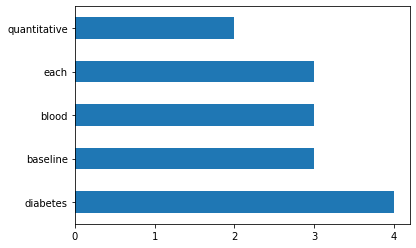

In [34]:
def count_words(word_list):
    # Count the words in the input list
    return {word: word_list.count(word) for word in word_list}

# Create the dictionary of words and word counts
word_count_dictionary = count_words(filtered_words)

(pd.DataFrame(word_count_dictionary.items())
 .sort_values(by=1, ascending=False)
 .head()
 .plot(x=0, kind="barh", xticks=range(5), legend=False)
 .set_ylabel("")
)
plt.show()

# Abstraction

## Instance method
In this exercise, we will work with a class called ScikitData that represents datasets from the popular Python machine learning library scikit-learn.

ScikitData has already been defined. In this exercise, we will define an instance method called pair_plot() and add it to ScikitData.

It is best practice to include all methods in the class definition, but we will add methods to ScikitData on the fly, so that we can build the class sequentially without redefining it.

Our pair_plot() instance method will plot dataset variables against each other using the pairplot() function, which has already been imported from the seaborn library.

Before we can use pair_plot() to make a scatterplot matrix, we will have to create a ScikitData instance.

### init

In [35]:
###################
##### inspect Function
###################

""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
import inspect
print_func(get_recommendations)
"""

#pas moyen de recuperer la classe ScikitData

' à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)\nimport inspect\nprint_func(get_recommendations)\n'

### code

In [36]:
# Fill in the first parameter in the pair_plot() definition
def pair_plot(self, vars=range(3), hue=None):
    return pairplot(pd.DataFrame(self.data), vars=vars, hue=hue, kind="reg")

ScikitData.pair_plot = pair_plot

# Create the diabetes instance of the ScikitData class
diabetes = ScikitData(prefix+"diabetes")
diabetes.pair_plot(vars=range(2, 6), hue=1)._legend.remove()
plt.show()

NameError: name 'ScikitData' is not defined

## Class method
The pair_plot() method we defined in the previous exercise facilitates exploratory data analysis.

If we have several datasets that we want to explore, it can be tedious to instantiate the ScikitData class repeatedly.

To enable rapid instantiation of our ScikitData class, we will add a class method called get_generator().

A class method is a good choice here, because we want to be able to access the class's ability to make new instances.

We will use get_generator() to create a generator named dataset_generator that will generate instances that represent the diabetes and iris datasets.

Instead of assigning the instances to variables, we will use a for loop and the pair_plot() instance method from the previous exercise to plot each dataset.

### code

In [37]:
# Fill in the decorator for the get_generator() definition
@classmethod
# Add the first parameter to the get_generator() definition
def get_generator(cls, dataset_names):
    return map(cls, dataset_names)

ScikitData.get_generator = get_generator
dataset_generator = ScikitData.get_generator(["diabetes", "iris"])
for dataset in dataset_generator:
    dataset.pair_plot()
    plt.show()

NameError: name 'ScikitData' is not defined